In [1]:
import numpy as np
from matplotlib import pyplot as plt
import os
import matplotlib.colors as mcolors

In [34]:
def load_data(filename):
    arr = np.loadtxt(filename, dtype='str', delimiter=',')
    arr = np.char.replace(arr, "im", "j")
    arr = np.char.replace(arr, " - ", "-")  
    arr = np.char.replace(arr, " + ", "+") 
    return arr.astype(complex)


def plot_heatmap(path, title, norm="log", logmin=1e-7, logmax=1):

    filename = path+"/Data_reconstructed/wf_evolution.txt"
    print(filename)
    if os.path.exists(filename):    
        arr = load_data(filename)
        arr[np.abs(arr)**2 < 1e-7] = 1e-7 # saveguard against too small values
        print(arr.shape)

        fig_width = 6  # Adjust this to control overall size
        fig_height = fig_width * 1.2  # Keep aspect square
        plt.figure(figsize=(fig_width, fig_height))
        x_width = 500
        crop = 0.4
        extent = [-x_width, x_width, 0, arr.shape[0]]
        plt.xlim(-crop*x_width, crop*x_width)
        plt.title(title)

        # different colourbars
        if norm == "log":
            #img = plt.imshow(np.abs(np.flipud(arr))**2, 
            #       norm=mcolors.LogNorm(vmin=logmin, vmax=logmax),  # Avoid zero values
            #       cmap='viridis', aspect='auto', extent=extent)
            #img = plt.imshow(np.abs(np.flipud(arr))**2, 
            #       norm=mcolors.LogNorm(vmin=1e-7, vmax=np.max(np.abs(np.flipud(arr))**2)),  # Avoid zero values
            #       cmap='viridis', aspect='auto', extent=extent)
            #img = plt.imshow(np.abs(np.flipud(arr))**2, 
            #       norm=mcolors.LogNorm(vmin=1e-7, vmax=logmax),  # Avoid zero values
            #       cmap='viridis', aspect='auto', extent=extent)
            img = plt.imshow(np.abs(np.flipud(arr))**2/np.max(np.abs(np.flipud(arr))**2), 
                   norm=mcolors.LogNorm(vmin=logmin, vmax=logmax),  # Avoid zero values
                   cmap='viridis', aspect='auto', extent=extent)
        elif norm == "power":
            gamma = 3  # Adjust gamma: <1 enhances large values, >1 enhances small values
            norm = mcolors.PowerNorm(gamma=gamma, vmin=logmin, vmax=logmax)
            img = plt.imshow(np.abs(np.flipud(arr))**2/np.max(np.abs(np.flipud(arr))**2), 
                   norm=norm,  # Avoid zero values
                   cmap='viridis', aspect='auto', extent=extent)
        elif norm == "normal": # normal scale
            #img = plt.imshow(np.abs(np.flipud(arr))**2,
            #       cmap='viridis', aspect='auto', extent=extent)
            img = plt.imshow(np.abs(np.flipud(arr))**2/np.max(np.abs(np.flipud(arr))**2),  
                   cmap='viridis', aspect='auto', extent=extent)
        else:
            print("wrong keyword for scale!")
            kfkjsl
        
        # need to adjust number of ticks according to how many wavefunctions were computed/max time reached!
        cbar = plt.colorbar(img)
        cbar.set_label("|psi|^2")
        new_yticks = np.linspace(0, 100, num=11)  # Choose 11 ticks for clarity
        new_yticklabels = np.linspace(0, 10, num=11)  # Map to [0, 100]
        plt.yticks(new_yticks, [f"{int(y)}" for y in new_yticklabels])
        plt.xlabel("position")
        plt.ylabel("time")
        plt.savefig(path+"/Plots/"+title+".png", dpi=300)
    else:
        print("File not found!")


def plot_heatmap_reduced(path, title, x0, xred, norm="log", logmin=1e-7, logmax=1):

    filename = path+"/Data_reconstructed/wf_evolution_red_"+str(x0)+"_"+str(xred)+".txt"
    print(filename)
    if os.path.exists(filename):    
        arr = load_data(filename)
        arr[np.abs(arr)**2 < 1e-7] = 1e-7
        fig_width = 6  # Adjust this to control overall size
        fig_height = fig_width * 1.2  # Keep aspect square
        plt.figure(figsize=(fig_width, fig_height))
        plt.xlim(x0-float(xred), x0+float(xred))
        plt.title(title)

        # construct reduced array of values -> zoom also in y direction
        T_min = 2
        T_max = 7
        ind_T_max = arr.shape[0] - T_max*10
        ind_T_min = arr.shape[0] - T_min*10
        arr_red = np.flipud(arr)[ind_T_max:ind_T_min, :]
        arr_min = np.min(np.abs(arr_red)**2)
        arr_max = np.max(np.abs(arr_red)**2)
        print("reduced data ", arr_red.shape)
        extent = [x0-float(xred), x0+float(xred), T_min*10, T_max*10]
        
        # different colourbars
        if norm == "log":
            #img = plt.imshow(np.abs(np.flipud(arr))**2, 
            #       norm=mcolors.LogNorm(vmin=logmin, vmax=logmax),  # Avoid zero values
            #       cmap='viridis', aspect='auto', extent=extent)
            #img = plt.imshow(np.abs(np.flipud(arr))**2, 
            #       norm=mcolors.LogNorm(vmin=1e-7, vmax=np.max(np.abs(np.flipud(arr))**2)),  # Avoid zero values
            #       cmap='viridis', aspect='auto', extent=extent)
            #img = plt.imshow(np.abs(np.flipud(arr))**2, 
            #       norm=mcolors.LogNorm(vmin=1e-7, vmax=logmax),  # Avoid zero values
            #       cmap='viridis', aspect='auto', extent=extent)
            
            #img = plt.imshow(np.abs(np.flipud(arr))**2/np.max(np.abs(np.flipud(arr))**2), 
            #       norm=mcolors.LogNorm(vmin=logmin, vmax=logmax),  # Avoid zero values
            #       cmap='viridis', aspect='auto', extent=extent)
            
            img = plt.imshow(np.abs(arr_red)**2/arr_max, 
                   norm=mcolors.LogNorm(vmin=arr_min/arr_max, vmax=1),  # Avoid zero values
                   cmap='viridis', aspect='auto', extent=extent)

            #img = plt.imshow(arr_red, 
            #       norm=mcolors.LogNorm(vmin=arr_min, vmax=arr_max),  # Avoid zero values
            #       cmap='viridis', aspect='auto')
        elif norm == "power":
            gamma = 3  # Adjust gamma: <1 enhances large values, >1 enhances small values
            norm = mcolors.PowerNorm(gamma=gamma, vmin=logmin, vmax=logmax)
            img = plt.imshow(np.abs(np.flipud(arr))**2/np.max(np.abs(np.flipud(arr))**2), 
                   norm=norm,  # Avoid zero values
                   cmap='viridis', aspect='auto', extent=extent)
        elif norm == "normal": # normal scale
            #img = plt.imshow(np.abs(np.flipud(arr))**2,
            #       cmap='viridis', aspect='auto', extent=extent)
            img = plt.imshow(np.abs(np.flipud(arr))**2/np.max(np.abs(np.flipud(arr))**2),  
                   cmap='viridis', aspect='auto', extent=extent)
        else:
            print("wrong keyword for scale!")
            kfkjsl
        
        cbar = plt.colorbar(img)
        cbar.set_label("|psi|^2")
        new_yticks = np.linspace(T_min*10, T_max*10, num=6)  
        new_yticklabels = np.linspace(T_min*10, T_max*10, num=6) 
        plt.yticks(new_yticks, [f"{int(y)}" for y in new_yticklabels])
        plt.xlabel("position")
        plt.ylabel("time")
        plt.savefig(path+"/Plots/"+title+".png", dpi=300)
        
    else:
        print("File not found!")



def load_width_data(filename):
    arr = np.loadtxt(filename)
    return arr


def plot_width(path, title):
    filename = path+"/Data_reconstructed/widths.txt"
    if os.path.exists(filename): 
        arr = load_width_data(filename)
        plt.plot(range(len(arr)), arr)#, label="omega1 = "+str(O1))
        #plt.legend()
        plt.xlabel("steps")
        plt.ylabel("wavepacket width")
        plt.savefig(path+"/Plots/"+title+".png", dpi=300)
    else:
        print("File not found!")


def plot_imbalance(path, title):
    filename = path+"/Data_reconstructed/av_imbalances.txt"
    print(filename)
    if os.path.exists(filename):  
        arr = load_data(filename)
        plt.plot(range(len(arr)), arr)#, label=label)
        plt.xlabel("time")
        plt.ylabel("average imbalance")
        plt.legend()
        plt.savefig(path+"/Plots/"+title+".png", dpi=300)
    else:
        print("File not found!")

        
def get_imbalance(path):
    filename = path+"/Data_reconstructed/av_imbalances.txt"
    print(filename)
    if os.path.exists(filename):  
        arr = load_data(filename)
        return arr
    else: 
        return [0]
    #plt.plot(range(len(arr)), arr, label=label)
    #plt.xlabel("time")
    #plt.ylabel("average imbalance")
    #plt.legend()

Runs/wf_evolution_quadratic_potential_sine_potential2_test_run/Data_reconstructed/wf_evolution.txt
(100, 4096)


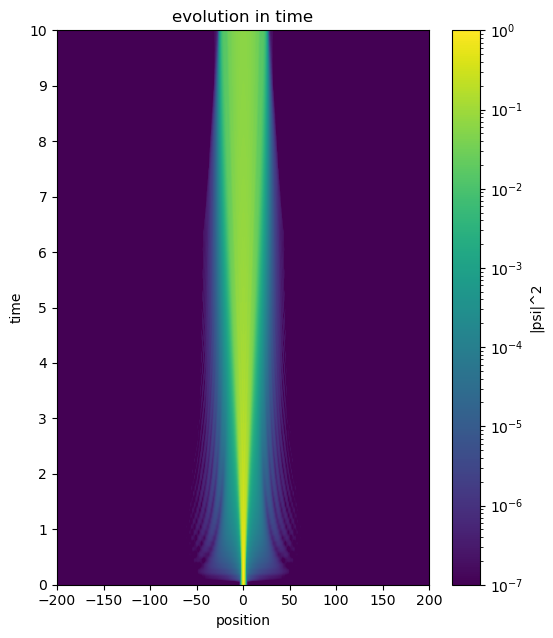

In [39]:
# plot heatmap

path = "Runs/wf_evolution_quadratic_potential_sine_potential2_test_run"
title = "evolution in time"

plot_heatmap(path, title, "log", 1e-7) 


Runs/wf_evolution_quadratic_potential_sine_potential2_test_run/Data_reconstructed/wf_evolution_red_5.0_1.txt
(50, 4096)
reduced data  (50, 4096)


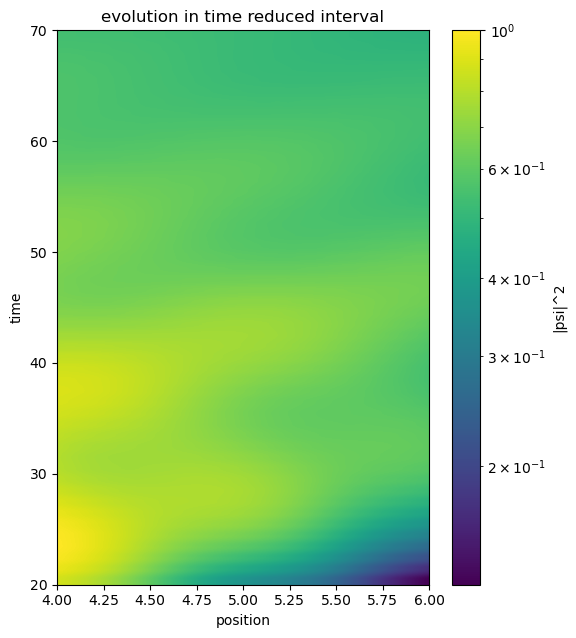

In [29]:
# plot heatmap reduced

path = "Runs/wf_evolution_quadratic_potential_sine_potential2_test_run"
title = "evolution in time reduced interval"
x0 = 5.0
xred = 1

plot_heatmap_reduced(path, title, x0, xred, norm="log", logmin=1e-7, logmax=1)



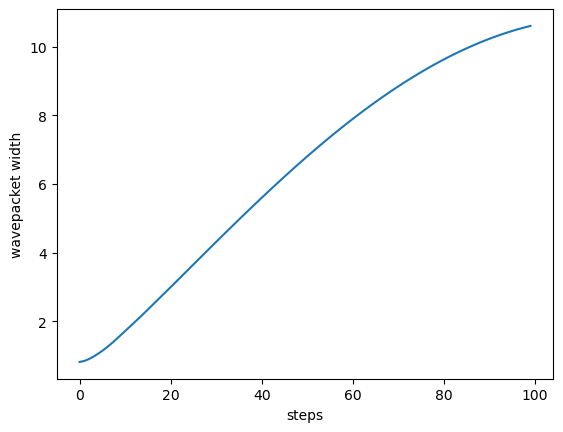

In [38]:
# plot width

path = "Runs/wf_evolution_quadratic_potential_sine_potential2_test_run"
title = "width function of time"
plot_width(path, title)
